### Problem Statement
    HELP International is an international humanitarian NGO committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It regularly runs operational projects, along with advocacy drives, to raise awareness and for funding purposes.

    After the recent funding programmes, they were able to raise around $10 million. Now, the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that arise while taking these decisions are mostly related to choosing the countries that are in dire need of aid.

    This is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then, you need to suggest the countries that the CEO needs to focus on the most. The data sets containing those socio-economic factors and the corresponding data dictionary are provided below.

### Objectives
    Your main task is to cluster the countries by the factors mentioned above and then present your solution and recommendations to the CEO using a PPT. The following approach is suggested:
    Start off with the necessary data inspection and EDA tasks suitable for this data set – data cleaning, univariate analysis, bivariate analysis, etc.
    You must perform the outlier analysis on the data set. However, you do have the flexibility of not removing the outliers if it suits the business needs or a lot of countries are getting removed. All you need to do is find the outliers in the data set, and then choose whether to keep them or remove them, depending on the results you get.
    


### Steps for clustering
    1. Data inspection
    2. EDA
        a. Data cleaning
        b. Univariate analysis
        c. Bivariate Analysis
    3. Data preparation for clustering
        a. Outlier Treatment
        b. Hopkin Check
        c. Scaling the data
    4. Perform Clustering
        a. Find the value of K 
            -- Elbow method
            -- Silhouette
        b. Run K-Means with the chosen K
        c. Visulise the clusters
    5. Conclusion
        a. Top 5 countires selection for financial aid
        b. Top 5 countires selection on some socio-economic and health factor

In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan


pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', None) 

import warnings
warnings.filterwarnings('ignore')

### 1.Data inspection

In [2]:
# Read the given CSV file
df = pd.read_csv(r'C:\Users\thani\Downloads\Country-data.csv')

In [3]:
# Reading the data dictionary file
data_dic = pd.read_csv(r'C:\Users\thani\Downloads\data-dictionary+.csv')
data_dic

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [4]:
# view some sample records.
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
#Determine the number of rows and columns
df.shape

(167, 10)

In [6]:
#Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
#summary of all the numeric columns in the dataset
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### 2. EDA
    check for missing values 

In [8]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum() * 100 / len(df.index)).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)


,Missing_Number,Missing_Percent
country,0,0.0
child_mort,0,0.0
exports,0,0.0
health,0,0.0
imports,0,0.0
income,0,0.0
inflation,0,0.0
life_expec,0,0.0
total_fer,0,0.0
gdpp,0,0.0


In [9]:
# Checking the duplicates
df.loc[df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [10]:
df.duplicated(subset='country').sum()

0

There is no duplicates values observed in the dataset

In [11]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Let's convert imports, exports and health spending from percentage values to actual values of their GDP per capita. Because the percentage values don't give a clear picture of that country. For eg. Afghanistan and Albania have similar imports percentage but their gdpp has a huge gap which doesn't give an accurate idea of which country is more developed than the other.

In [12]:
# Convert % columns to actual values
df['exports'] =df['exports']*df['gdpp']/100
df['imports'] =df['imports']*df['gdpp']/100
df['health'] =df['health']*df['gdpp']/100

In [13]:
# view some sample records.
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [14]:
#summary of all the numeric columns in the dataset
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [15]:
col = df.columns

In [16]:
col

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

### univariate analysis
     analysis the  numerical variables, it is essential to use a box plot. This method allows for a clear visualization of the distribution and enables the identification of any outliers with confidence.

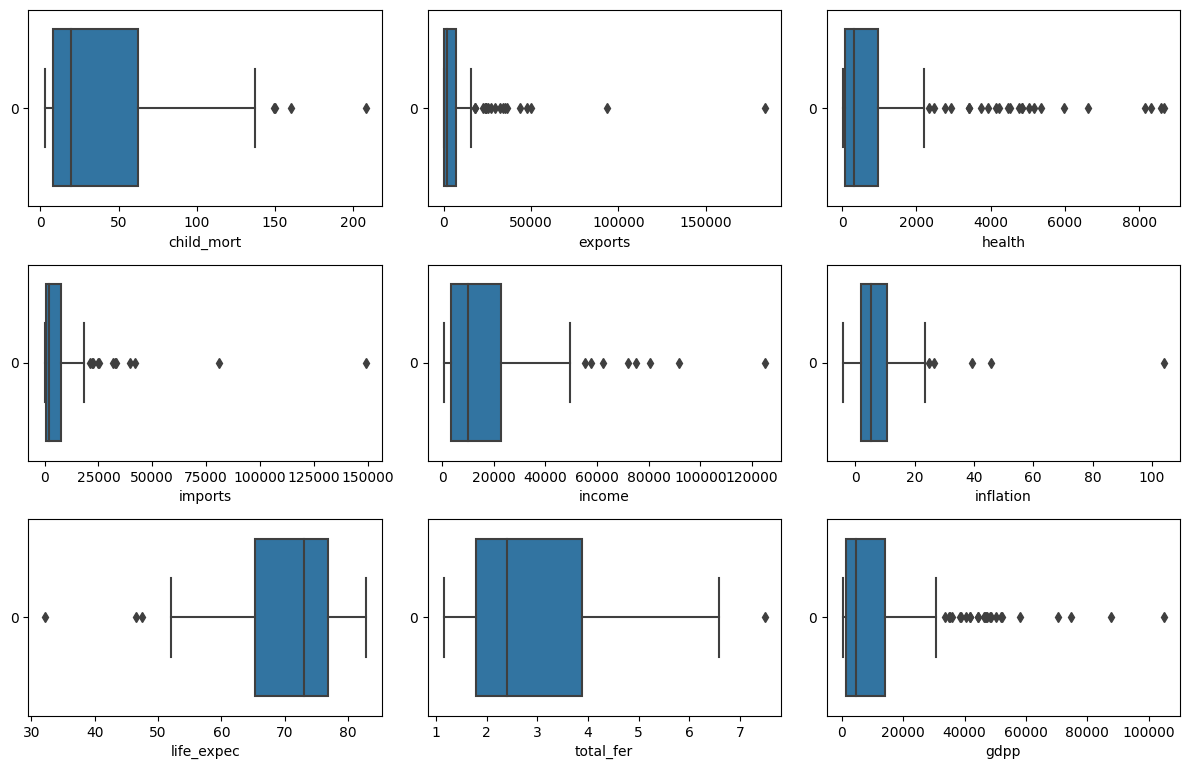

In [17]:
fig=plt.subplots(figsize=(12, 15))

for i, feature in enumerate(df.drop('country', axis=1).columns):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(df[feature],orient='h')
    plt.xlabel(feature)
    plt.tight_layout()

plt.show()

#### insights:
    Child mortality is very high in a few countries it cannot be considered as outliers since they may be countries that need the funds.
    In columns like income, gdpp, exports and imports the outliers are soft capped since if theses are showing a high number; it means indirectly that the countries may not be requiring monetary funds.
    Life expectancy has outliers below the 25 percentile. These may be countries which need help to better their healthcare facilities. Hence they are also not removed.

In [18]:
df.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.96,0.97,0.98,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
96%,120.440000,34258.200000,5229.992000,27701.008000,56256.000000,22.544000,81.572000,6.153600,50876.000000


#### Bivariate analysis
        country vs other variables 

In [19]:
def bivariate(col):
    new_df = df.groupby('country')[col].sum().sort_values(ascending=False)
    new_df=pd.DataFrame(new_df)
    new_df_1=new_df.head(10)
    new_df_2=new_df.tail(10)
    plt.figure(figsize=(10, 5))
    plt.subplot(1,2,1)
    sns.barplot(x =new_df_1.index,y = new_df_1[col])
    plt.title('Countries having high '+ col ,size=12)
    plt.xticks(rotation=45,ha='right')
    plt.subplot(1,2,2)
    sns.barplot(x = new_df_2.index, y = new_df_2[col])
    plt.title('Countries having low '+col , size=12)
    plt.xticks(rotation=45,ha='right')
    plt.tight_layout()
    plt.show()

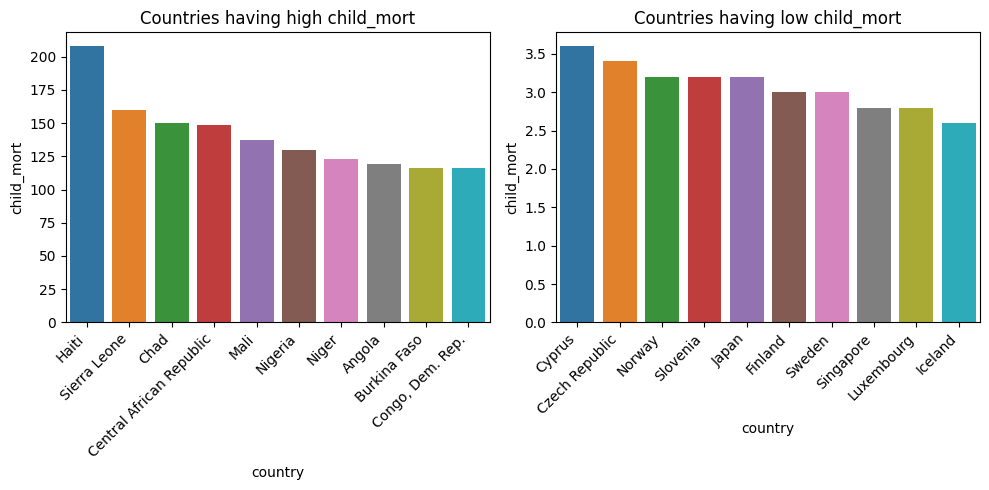

In [20]:
bivariate('child_mort')

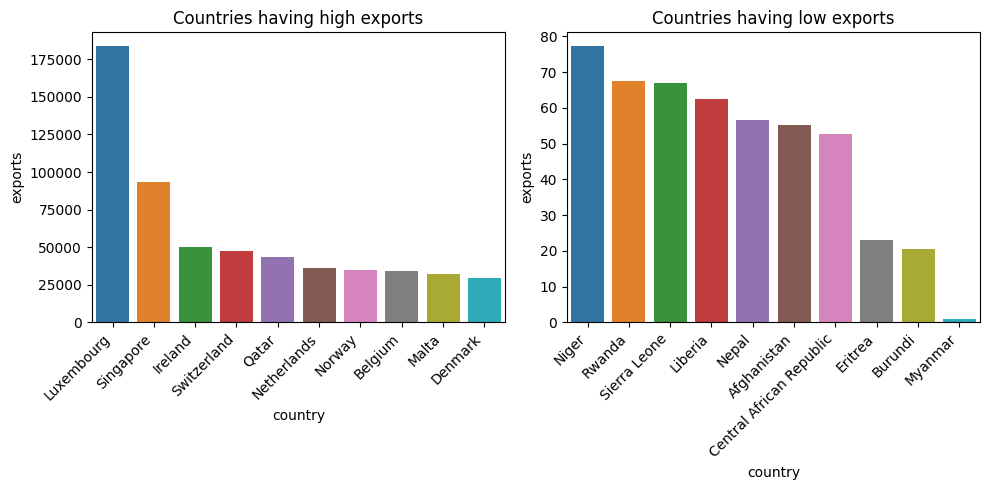

In [21]:
bivariate('exports')

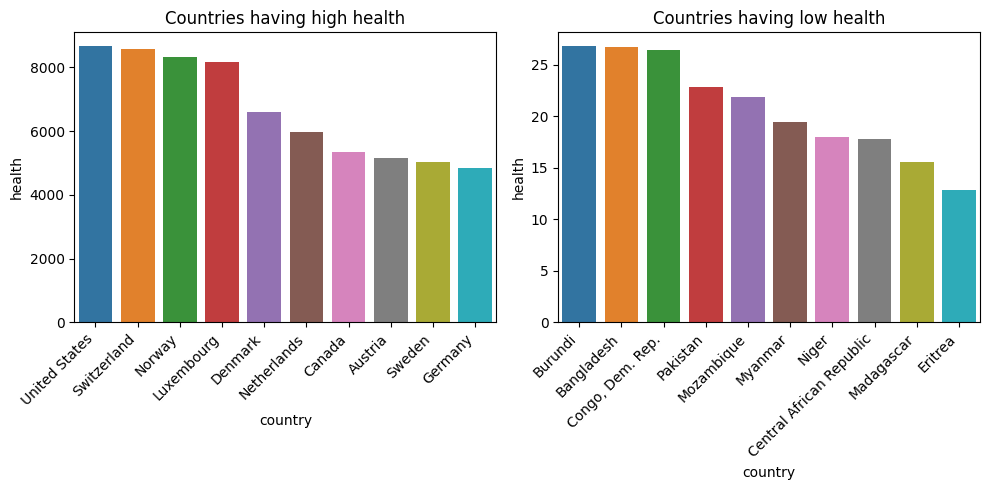

In [22]:
bivariate('health')

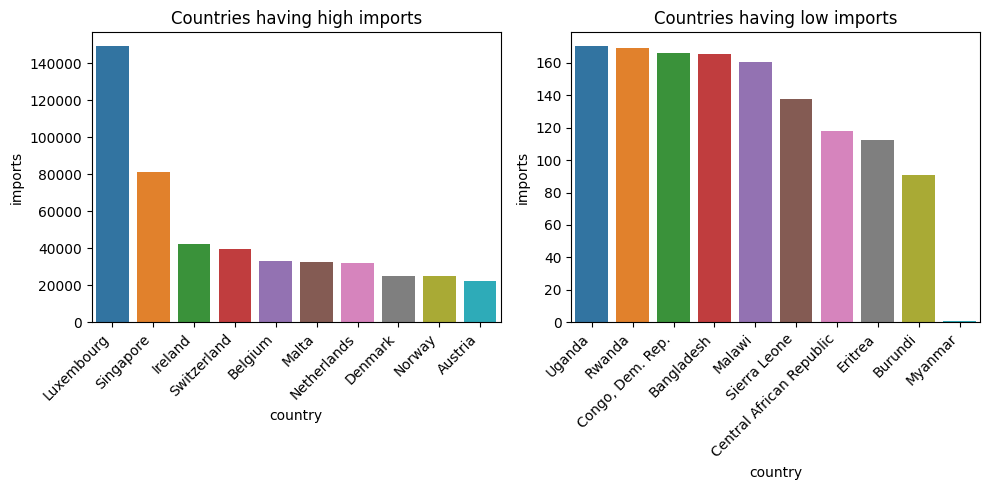

In [23]:
bivariate('imports')

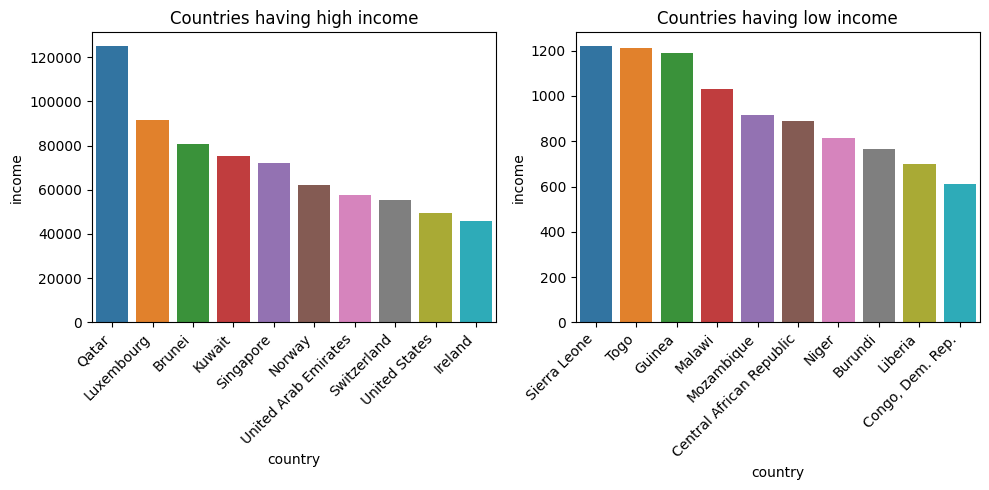

In [24]:
bivariate('income')

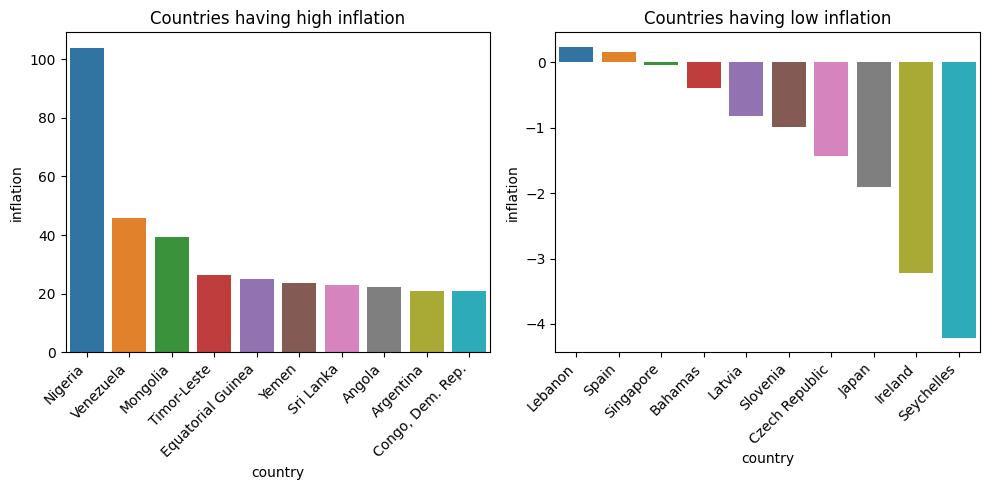

In [25]:
bivariate('inflation')

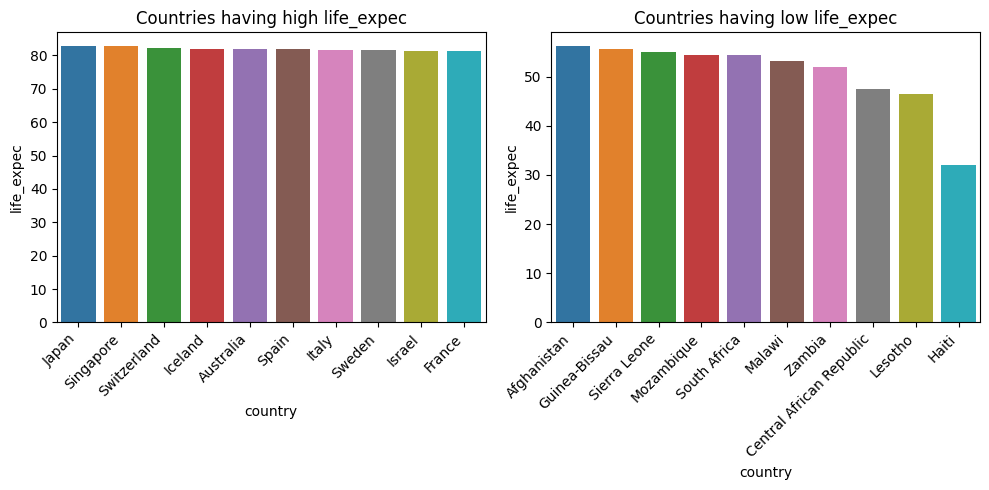

In [26]:
bivariate('life_expec')

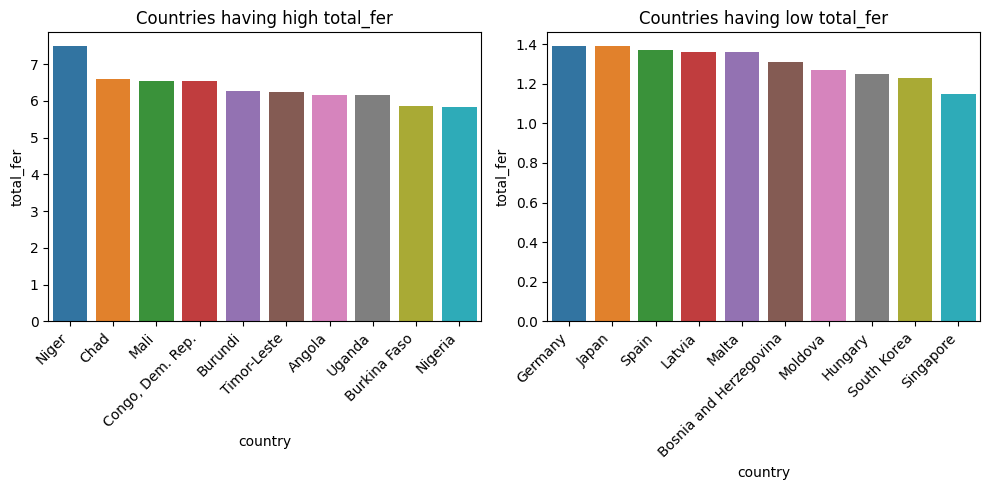

In [27]:
bivariate('total_fer')

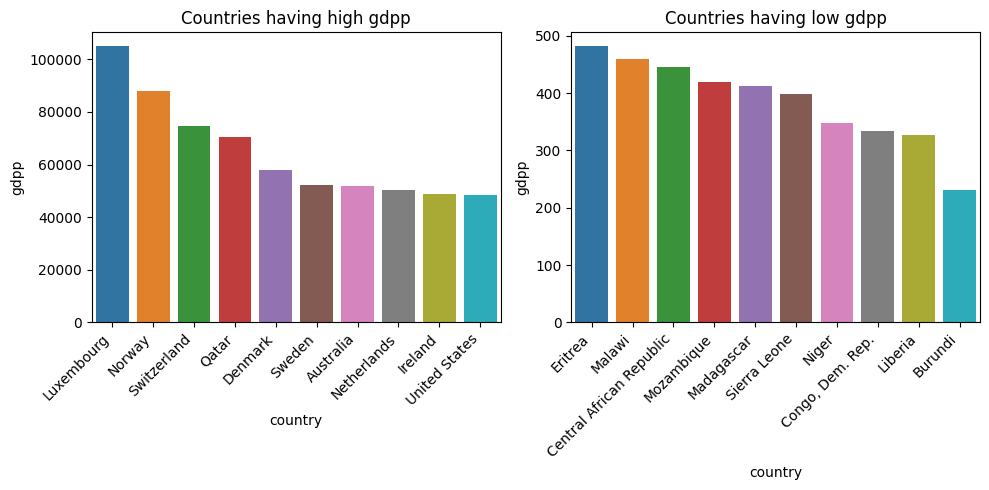

In [28]:
bivariate('gdpp')

#### insights
        Some countries with inadequate healthcare include Haiti, Sierra Leone, the Central African Republic, Nigeria, and the Democratic Republic of Congo.
        These are the countries with weak financial regulations are Sierra Leone, Burundi, Eritrea,Central African Republic, Liberia, Nigeria.

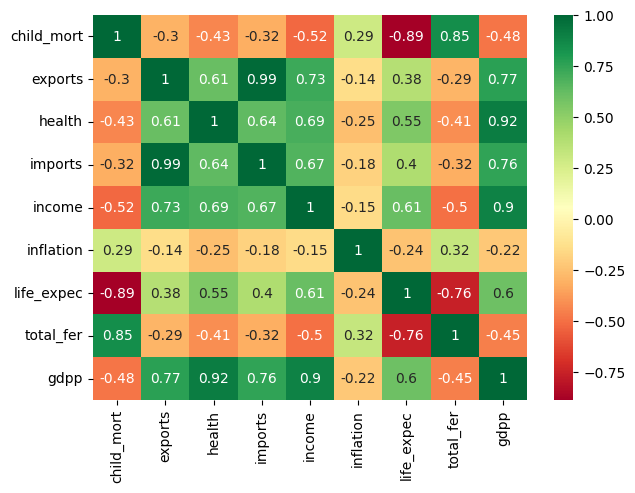

In [29]:
# Heatmap to understand the attributes dependency
plt.figure(figsize=(7,5))
sns.heatmap(df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']].corr(),annot=True,cmap='RdYlGn')
plt.show()

#### insights 
    child_mort has highly negative correlation with life_excpec
    exports has high positive correlation with income
    health has high correlation with gdpp
    import has high correlation with exports
    income has high correlation with gdp
    total_fer has high correlation with life_excpec

### 3. Data preparation for clustering
#### outlier treatment

In [30]:
# #summary of all the numeric columns in the dataset at different percentiles
df.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.96,0.97,0.98,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
96%,120.440000,34258.200000,5229.992000,27701.008000,56256.000000,22.544000,81.572000,6.153600,50876.000000


In [31]:
df.shape

(167, 10)

In [32]:
Q1 = df.health.quantile(0.975)
df = df[df.health <= Q1]

Q2 = df.exports.quantile(0.975)
df = df[df.exports <= Q2]

Q3 = df.imports.quantile(0.975)
df = df[df.imports <= Q3]

Q4 = df.income.quantile(0.975)
df = df[df.income <= Q4]

Q5 = df.inflation.quantile(0.975)
df = df[df.inflation <= Q5]

Q6 = df.life_expec.quantile(0.975)
df = df[df.life_expec <= Q6]

Q7 = df.gdpp.quantile(0.975)
df = df[df.gdpp <= Q4]



In [33]:
df.shape

(139, 10)

In [34]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,43.266187,2995.628112,538.001396,3118.876490,11166.568345,7.022964,68.980576,3.096115,7041.251799
std,40.955128,3978.901514,870.959198,3821.434934,9993.165376,6.232851,8.668717,1.535881,8900.260679
min,3.200000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.230000,231.000000
25%,11.600000,358.273000,57.857500,441.554000,2740.000000,2.025000,62.850000,1.870000,1185.000000
50%,25.100000,1369.170000,223.215000,1541.260000,8430.000000,5.450000,70.500000,2.600000,3650.000000
75%,63.800000,3410.700000,572.235000,3625.620000,16250.000000,10.050000,75.900000,4.355000,8805.000000
max,208.000000,17681.400000,4848.800000,17710.000000,41100.000000,24.900000,81.700000,7.490000,41800.000000


In [35]:
missing(df)

,Missing_Number,Missing_Percent
country,0,0.0
child_mort,0,0.0
exports,0,0.0
health,0,0.0
imports,0,0.0
income,0,0.0
inflation,0,0.0
life_expec,0,0.0
total_fer,0,0.0
gdpp,0,0.0


### hopkins
    The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

In [36]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [37]:
X = df.drop(['country'],axis=1)
hopkins(X)

0.8794830183637123

We can see that the value is between {0.8, ..., 0.99}, so the dataset has a high tendency to cluster.

### scaling the data
    The standard scaler is used to scale the numerical columns

In [38]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [39]:
scale_var = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

scaler = StandardScaler()

df_1 = df.copy()

df_1[scale_var] = scaler.fit_transform(df[scale_var])

df_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.150126,-0.741652,-0.571643,-0.753895,-0.959769,0.389192,-1.479665,1.779914,-0.731632
1,Albania,-0.653462,-0.466742,-0.311247,-0.297068,-0.124189,-0.407859,0.847403,-0.944960,-0.332791
2,Algeria,-0.391256,-0.323614,-0.405636,-0.451310,0.174089,1.461589,0.870558,-0.134685,-0.291069
3,Angola,1.855878,-0.200889,-0.504017,-0.421389,-0.528923,2.476018,-1.028145,2.002086,-0.395938
4,Antigua and Barbuda,-0.807845,0.644553,0.227764,1.068089,0.796757,-0.898972,0.905290,-0.631305,0.581714


### Perform Clustering


#### Find the value of K 
    To Choose the value of k, there are two methods, 1. Silhouette score 2. Elbow curve-ssd
##### Elbow method

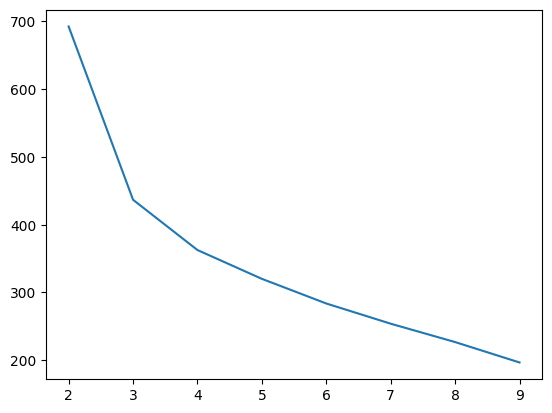

In [40]:
ssd = []

range_n_cluster = [2,3,4,5,6,7,8,9]

for num in range_n_cluster:
    kmeans = KMeans(n_clusters=num,max_iter=50)
    kmeans.fit(df_1.drop('country',axis=1))
    ssd.append(kmeans.inertia_)
    
plt.plot(range_n_cluster,ssd)
plt.show()

#### Silhouette

for n cluster = 2, the silc_score0.6598663908968507
for n cluster = 3, the silc_score0.5929510536706241
for n cluster = 4, the silc_score0.5286539387357387
for n cluster = 5, the silc_score0.5232234102441948
for n cluster = 6, the silc_score0.5105783734703494
for n cluster = 7, the silc_score0.5089574549154726
for n cluster = 8, the silc_score0.46578529211512437


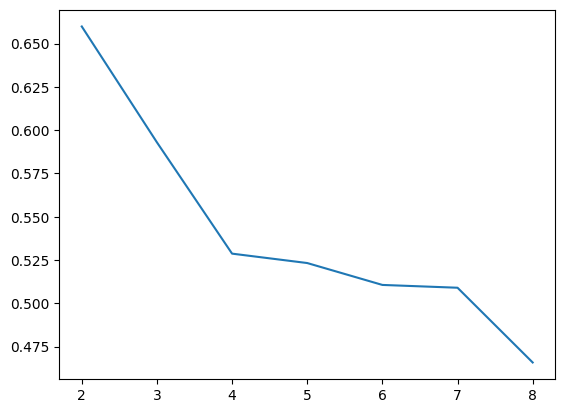

In [41]:
range_n_cluster = [2,3,4,5,6,7,8]
ss = []
for num in range_n_cluster:
    kmeans = KMeans(n_clusters=num,max_iter=50)
    kmeans.fit(X)

    cluster_labels = kmeans.labels_
    avg_sil_score =silhouette_score(X,cluster_labels)
    ss.append(avg_sil_score)
    print(f'for n cluster = {num}, the silc_score{avg_sil_score}')
    
plt.plot(range_n_cluster,ss)

From the elbow curve above we can see that we have a breakpoint at 3 and one breakpoint at 4.
From the plot of silhouette score above, We can see that we have the maximum at 2, and next maximum is at 3. So we can go with 3.

### Run K-Means with the chosen K

In [42]:
model_bin3 = KMeans(n_clusters=3,max_iter=50)
model_bin3.fit(X)

KMeans(max_iter=50, n_clusters=3)

In [43]:
df['lables'] = model_bin3.labels_

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,lables
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


In [44]:
df['lables'].value_counts()

lables
0    85
2    38
1    16
Name: count, dtype: int64

In [45]:
df_lables = df.copy()

In [46]:
df_lables.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,lables
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


In [47]:
clu_child = pd.DataFrame(df.groupby(["lables"])['child_mort'].mean())
clu_exports = pd.DataFrame(df.groupby(["lables"])['exports'].mean())
clu_health = pd.DataFrame(df.groupby(["lables"])['health'].mean())
clu_imports = pd.DataFrame(df.groupby(["lables"])['imports'].mean())
clu_income = pd.DataFrame(df.groupby(["lables"])['income'].mean())
clu_inflation = pd.DataFrame(df.groupby(["lables"])['inflation'].mean())
clu_life_expec = pd.DataFrame(df.groupby(["lables"])['life_expec'].mean())
clu_total_fer = pd.DataFrame(df.groupby(["lables"])['total_fer'].mean())
clu_gdpp = pd.DataFrame(df.groupby(["lables"])['gdpp'].mean())

df_cluster = pd.concat([pd.Series([0,1,2]),clu_child,clu_exports,clu_health,clu_imports,clu_income,clu_inflation,clu_life_expec,clu_total_fer,clu_gdpp],axis=1)
df_cluster.rename(columns={0:'labels'})
df_cluster


,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,60.738824,729.141383,125.429707,980.216966,4612.388235,7.915365,65.325882,3.770118,2088.282353
1,1,11.931250,11760.275000,2526.360000,11603.993750,31981.250000,2.856125,78.075000,1.953750,28081.250000
2,2,17.376316,4375.023421,623.655500,4330.039211,17063.157895,6.781263,73.326316,2.069474,9261.315789


### Visualize the clusters

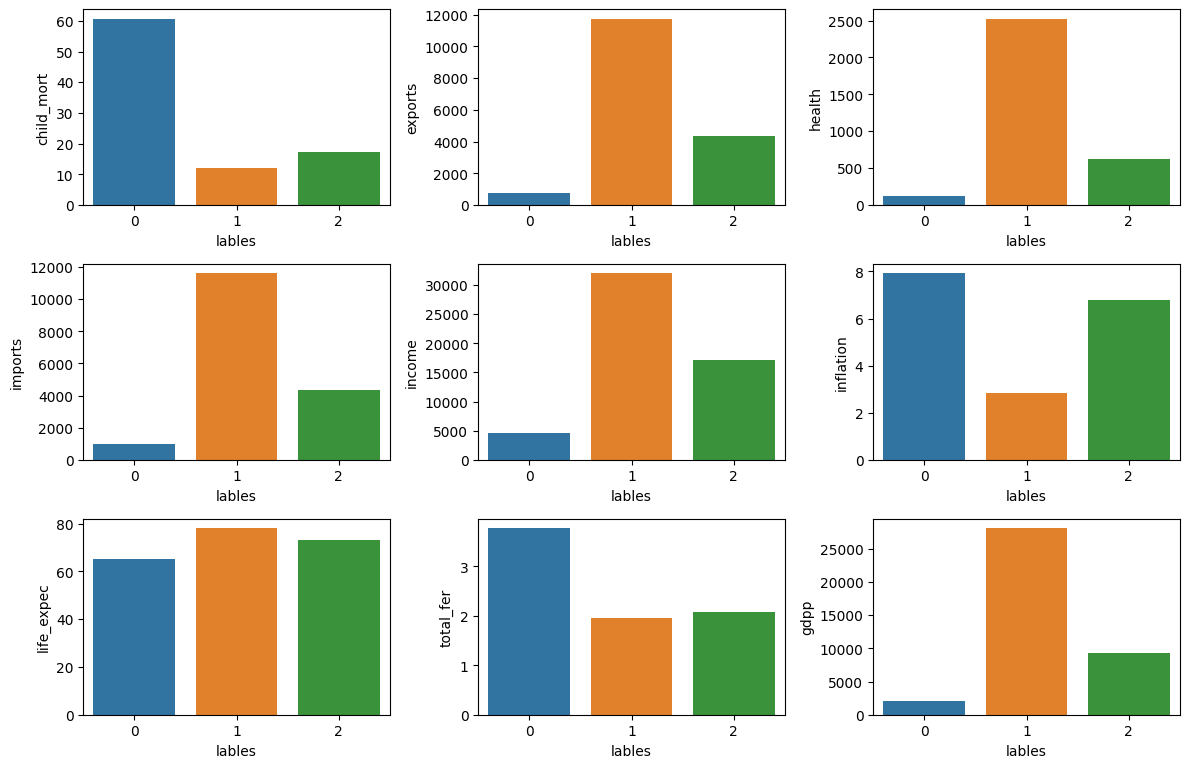

In [48]:
fig=plt.subplots(figsize=(12, 15))

for i, feature in enumerate(df.drop(['country','lables'], axis=1).columns):
    plt.subplot(6, 3, i+1)
    sns.barplot(x = df['lables'], y =df[feature],ci=None )
    plt.xlabel('lables')
    plt.tight_layout()

plt.show()

#### From cluster profiling in K- means clustering we can see that :
    1. Cluster 0 is having the High child mortality, High inflation, High total_fer and Low Income,Low Exports, Low GDP, Low Health, Low life_expec
    2. Cluster 1 is having the Low child mortality, Low inflation, Low total_fer and High Income,High Exports, High GDP, High Health, High life_expec
    3. Cluster 2 is falls in between Cluster 0 and Cluster 1
    
    
### cluster 0 : Developed Countries
### Cluster 1: Undeveloped Countries
### Cluste 2: Developing Countries

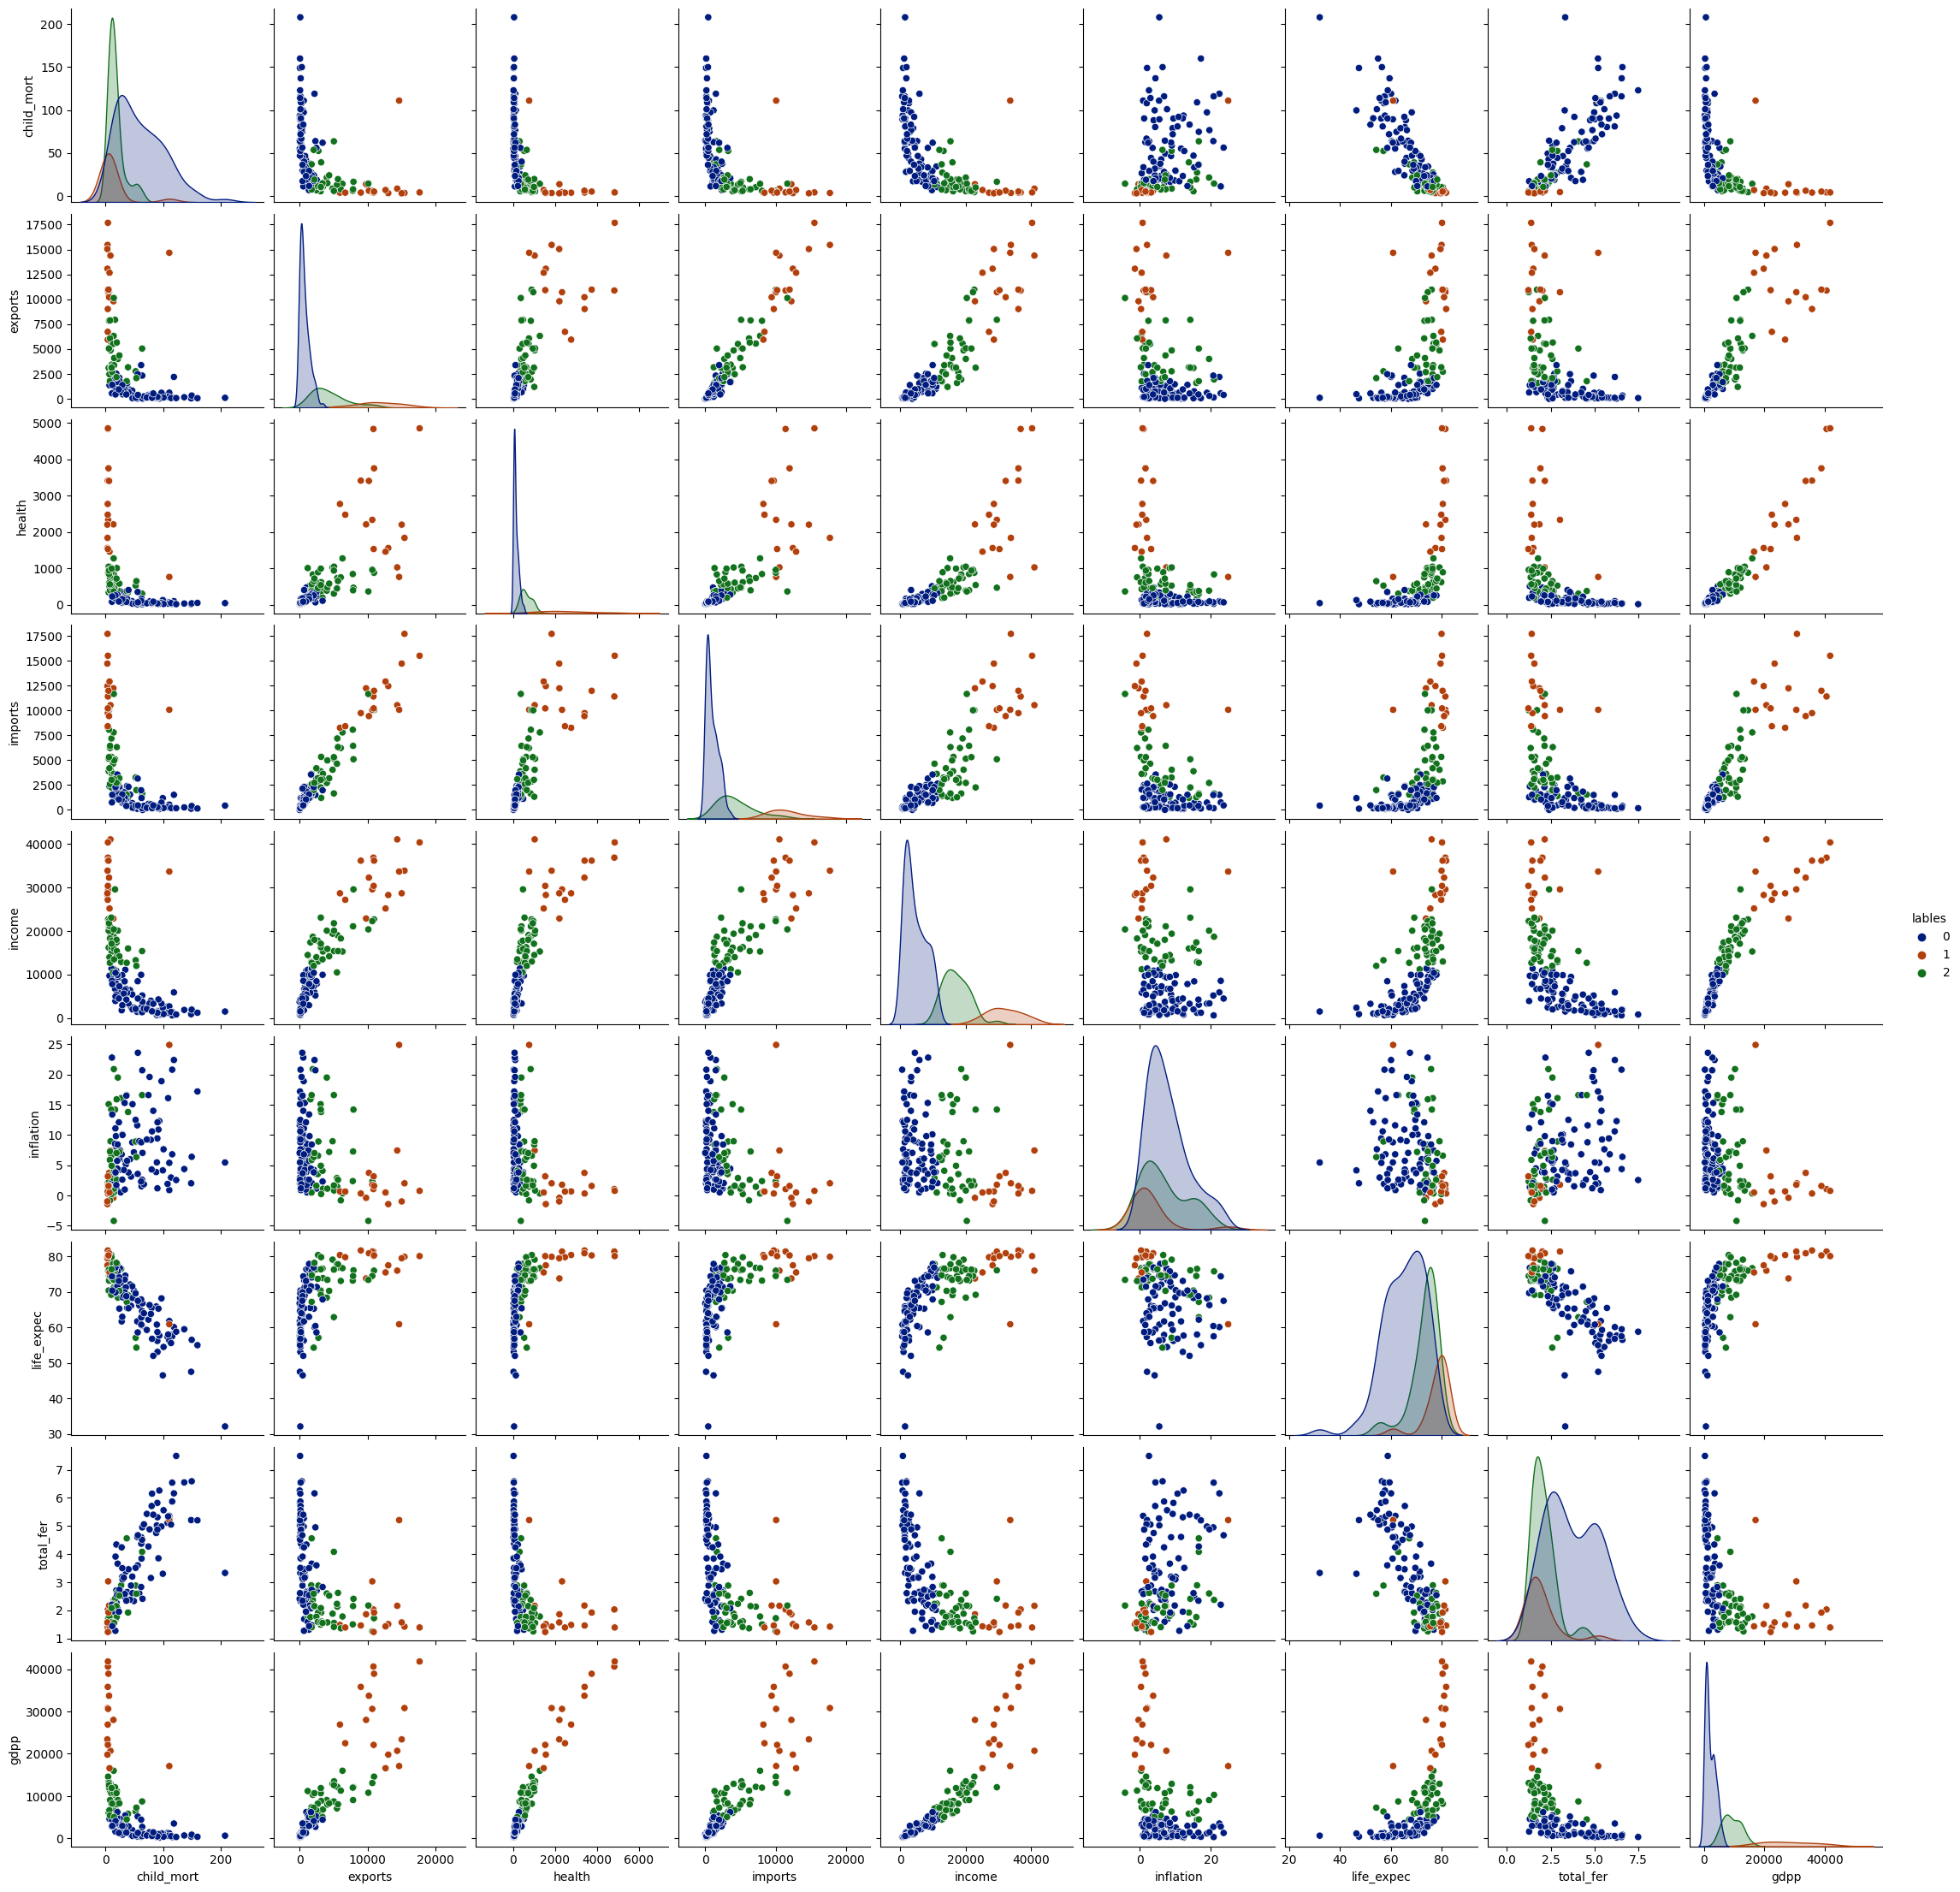

In [49]:
num_col = df.drop(['country'],axis=1).columns
sns.pairplot(data = df[num_col],hue='lables', palette='dark')
plt.show()

### insights:
    Countries with low gdpp (GDP per capita) have high child mortality
    Countries with low income (Net income per person) have high child mortality
    gdpp and income have strong linear relationship
    From the 3 features (gdpp, income and child_mort), the countries that need the financial aid at most belong to

In [50]:
# Countries in belonging to cluster 0 group need aid at first.
# Finding the number of countries belonging to cluster 0
ans = df.country[df.lables == 0]
print(f'number of countries in cluster 0:{len(ans)}')

number of countries in cluster 0:85


#### view the clusters in 3D graph 

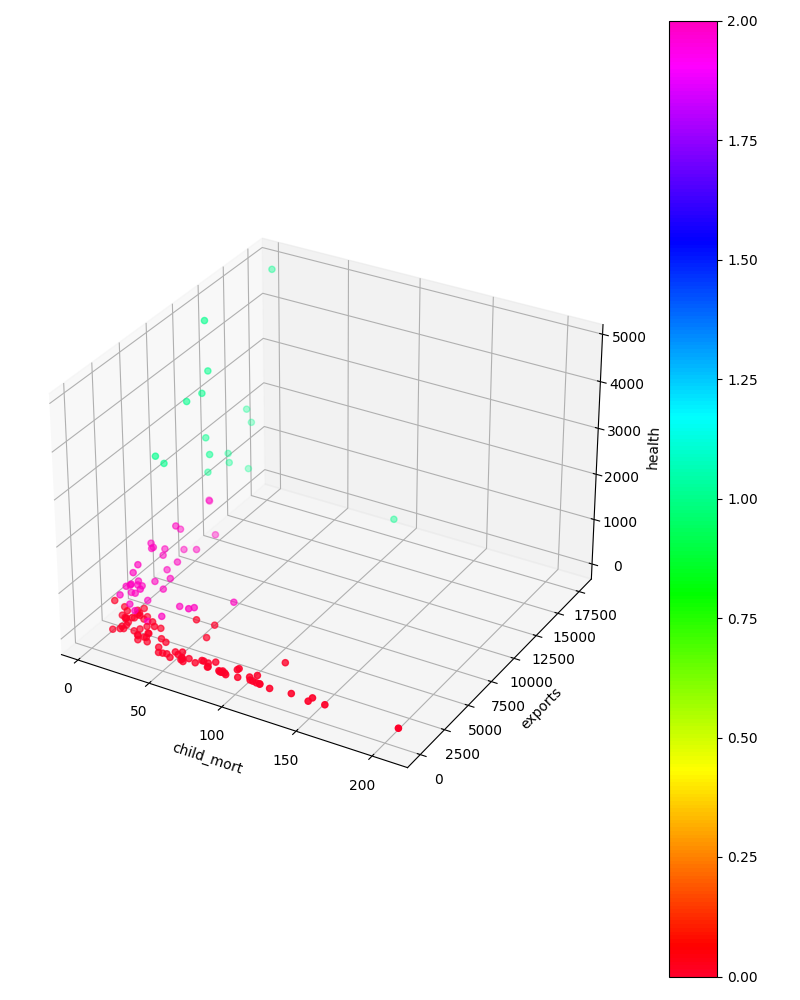

In [51]:
%matplotlib widget
import matplotlib.cm as cm
fig =  plt.figure(figsize=(8,10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter3D(df['child_mort'], df['exports'], df['health'],c = model_bin3.labels_,cmap = cm.gist_rainbow)
plt.colorbar(sc)
ax.set_xlabel('child_mort')
ax.set_ylabel('exports')
ax.set_zlabel('health')
plt.tight_layout()
plt.show()

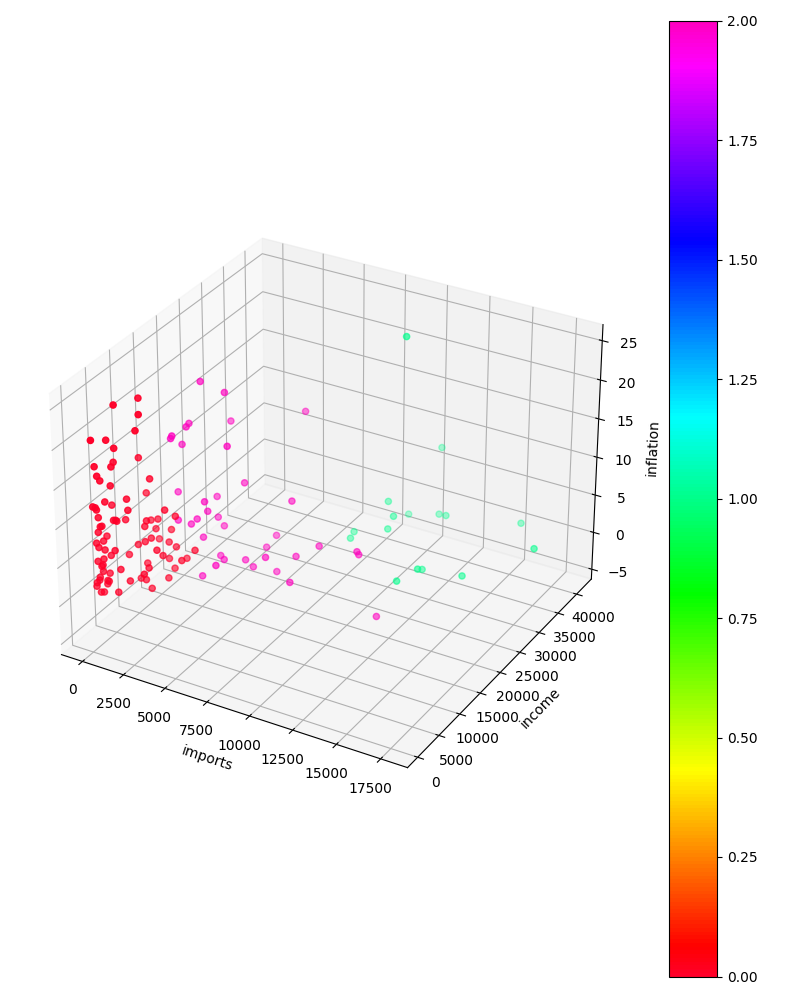

In [52]:
fig =  plt.figure(figsize=(8,10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter3D(df['imports'], df['income'], df['inflation'],c = model_bin3.labels_,cmap = cm.gist_rainbow)
plt.colorbar(sc)
ax.set_xlabel('imports')
ax.set_ylabel('income')
ax.set_zlabel('inflation')
plt.tight_layout()
plt.show()

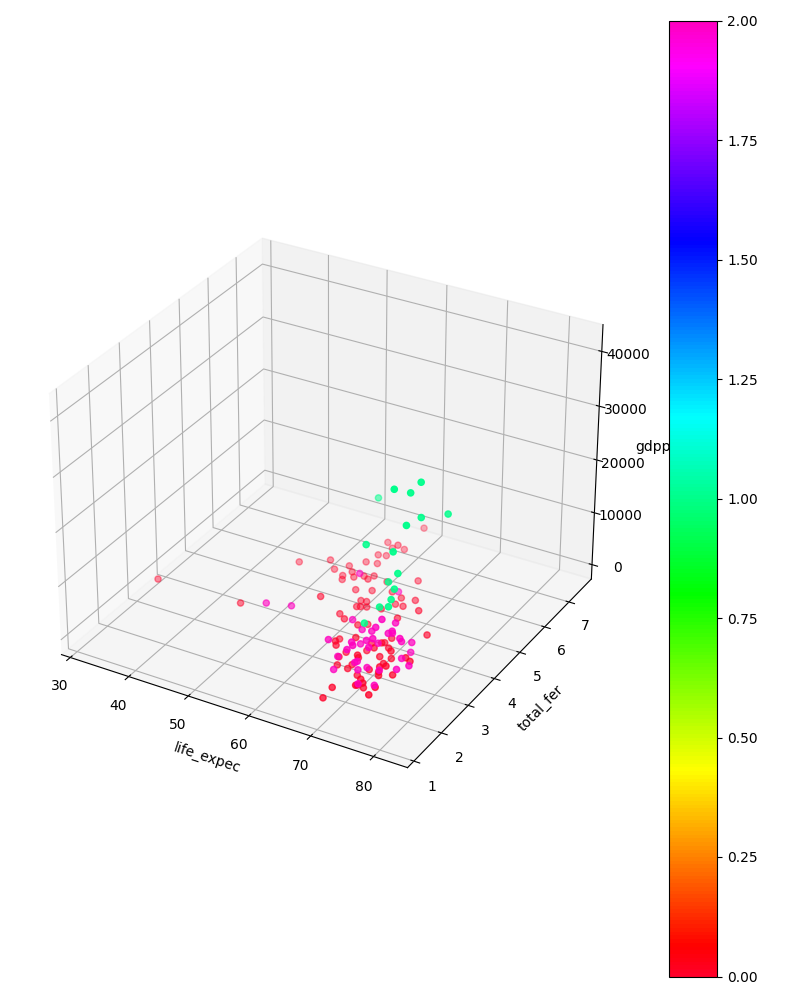

In [53]:

fig =  plt.figure(figsize=(8,10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter3D(df['life_expec'], df['total_fer'], df['gdpp'],c = model_bin3.labels_,cmap = cm.gist_rainbow)
plt.colorbar(sc)
ax.set_xlabel('life_expec')
ax.set_ylabel('total_fer')
ax.set_zlabel('gdpp')
plt.tight_layout()
plt.show()

from the above 3D graph, we can see that data was well clustered

In [54]:
df[df.lables == 0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,lables
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,0
12,Bangladesh,49.4,121.28,26.6816,165.244,2440,7.14,70.4,2.33,758,0


In [55]:
### Countries we should focus more on:

In [56]:
ans = df[df.lables == 0]


In [57]:
#Sorting based on high child mortality,low health and low income ,low gdp
health = ans.sort_values(by =['child_mort','health','income','gdpp'], ascending = [False,True ,True, True])
health.head(25)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,lables
66,Haiti,208.0,101.2860,45.7442,428.314,1500,5.450,32.1,3.33,662,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.200,55.0,5.20,399,0
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,0
97,Mali,137.0,161.4240,35.2584,248.508,1870,4.370,59.5,6.55,708,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.550,58.8,7.49,348,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,0
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.970,55.6,5.05,547,0


In [58]:
# Top 10 countries which are in direst need of aid
f=health[['country']].head(10)
df_ans = f.reset_index(drop=True)
df_ans

,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali
5,Niger
6,Angola
7,"Congo, Dem. Rep."
8,Burkina Faso
9,Guinea-Bissau
